In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor

In [2]:
import pandas as pd

df = pd.read_csv(
    r'D:\All project set\Projects\ML Project\E-Commerce Sales Prediction\E-Commerce_Sales_Dataset.csv',
    encoding='latin1'
)

print('Shape:', df.shape)
df.head(2)


Shape: (9994, 23)


,Row ID,Order ID,Year,Order Date,Ship Date,shipment days,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013,09-11-2013,12-11-2013,3,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,2013,09-11-2013,12-11-2013,3,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
drop_cols = [
    "Row ID","Order ID","Order Date","Ship Date","Customer ID","Customer Name","Country","City",
    "State","Postal Code","Product ID","Product Name","Profit"
]
df = df.drop(columns = [col for col in drop_cols if col in df.columns])
print("Remaining Columns: ", df.columns.tolist())
print("Shape of Remaining Columns: ", df.shape)

Remaining Columns:  ['Year', 'shipment days', 'Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount']
Shape of Remaining Columns:  (9994, 10)


In [4]:
df.columns = df.columns.str.replace('\xa0','', regex=True).str.strip()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('\xa0',' ', regex=True).str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           9994 non-null   int64  
 1   shipment days  9994 non-null   int64  
 2   Ship Mode      9994 non-null   object 
 3   Segment        9994 non-null   object 
 4   Region         9994 non-null   object 
 5   Category       9994 non-null   object 
 6   Sub-Category   9994 non-null   object 
 7   Sales          9994 non-null   float64
 8   Quantity       9994 non-null   int64  
 9   Discount       9994 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 780.9+ KB


In [6]:
print('Missing Values: \n',df.isnull().sum())

Missing Values: 
 Year             0
shipment days    0
Ship Mode        0
Segment          0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
dtype: int64


In [7]:
print('Duplicated values:',df.duplicated().sum())

Duplicated values: 36


In [8]:
df.drop_duplicates(inplace=True)
print('Duplicated values:',df.duplicated().sum())

Duplicated values: 0


In [9]:
df.describe()

,Year,shipment days,Sales,Quantity,Discount
count,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000
mean,2012.722635,3.958425,230.275666,3.792027,0.156366
std,1.123575,1.748492,624.252715,2.226870,0.206667
min,2011.000000,0.000000,0.444000,1.000000,0.000000
25%,2012.000000,3.000000,17.280000,2.000000,0.000000
50%,2013.000000,4.000000,54.816000,3.000000,0.200000
75%,2014.000000,5.000000,209.962500,5.000000,0.200000
max,2014.000000,7.000000,22638.480000,14.000000,0.800000


In [10]:
target_col = 'Sales'  # change if different
df = df.dropna(subset=[target_col])

In [11]:
X = df.drop(columns=[target_col], axis=1)
y = df[target_col]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()


In [12]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [13]:
pipelines = {
    'LinearRegression': Pipeline([
        ('preproc', preprocessor),
        ('reg', LinearRegression())
    ]),
    'RandomForest': Pipeline([
        ('preproc', preprocessor),
        ('reg', RandomForestRegressor(random_state=42))
    ]),
    'XGBRegressor': Pipeline([
        ('preproc', preprocessor),
        ('reg', XGBRegressor(random_state=42))
    ])
}


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [15]:
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'reg__n_estimators': [100, 200, 300],
        'reg__max_depth': [5, 10, 15]
    },
    'XGBRegressor': {
        'reg__n_estimators': [100, 200],
        'reg__max_depth': [3, 5, 7],
        'reg__learning_rate': [0.05, 0.1]
    }
}

Tuning LinearRegression 

CV_Score: 0.2567
Best Params: {}
R2 Score: 0.1550
Mean Absolute Error: 210.9666
Mean Squared Error: 204325.4033
RMSE Score: 452.0237


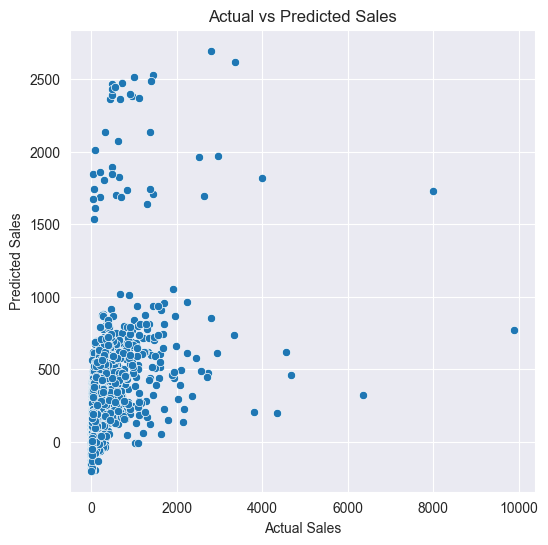

Tuning RandomForest 

CV_Score: 0.1665
Best Params: {'reg__max_depth': 5, 'reg__n_estimators': 100}
R2 Score: -0.0167
Mean Absolute Error: 196.6877
Mean Squared Error: 245837.5897
RMSE Score: 495.8201


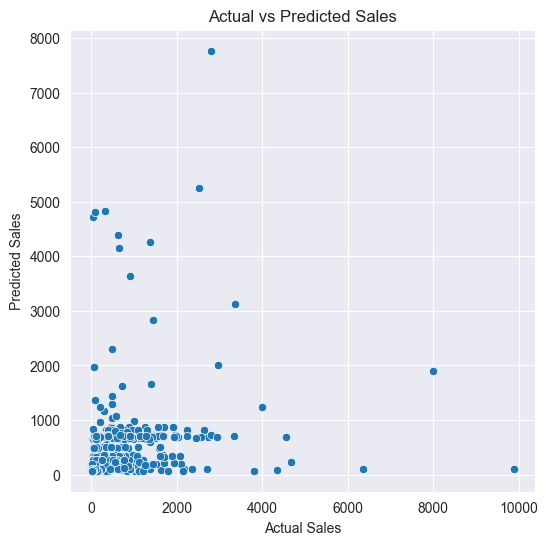

Tuning XGBRegressor 

CV_Score: 0.1948
Best Params: {'reg__learning_rate': 0.1, 'reg__max_depth': 3, 'reg__n_estimators': 100}
R2 Score: 0.1030
Mean Absolute Error: 183.4285
Mean Squared Error: 216889.2383
RMSE Score: 465.7137


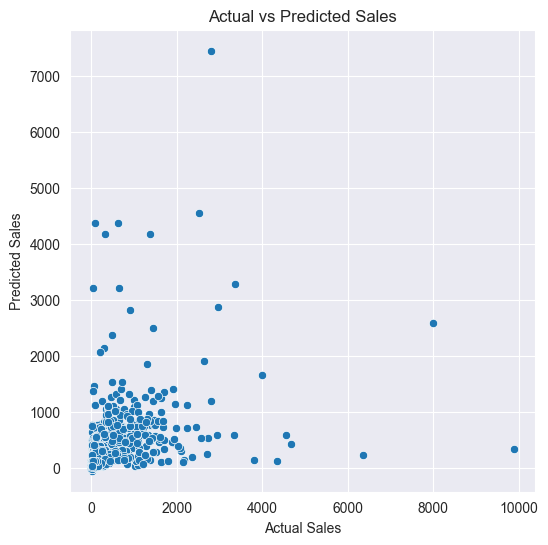

In [16]:
results = []
best_model = None
best_score = 0
best_name = None

for name, pipe in pipelines.items():
    grid = GridSearchCV(pipe, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'Tuning {name} \n')
    print(f'CV_Score: {grid.best_score_ :.4f}')
    print(f'Best Params: {grid.best_params_}')
    print(f'R2 Score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'RMSE Score: {rmse:.4f}')

    if r2 > best_score:
        best_model = model
        best_score = r2
        best_name = name

    results.append({
        'Model':name,
        'R2':r2,
        'MAE':mae,
        'MSE':mse,
        'RMSE':rmse,
        'CV_Score':grid.best_score_})

    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Actual vs Predicted Sales')
    plt.show()


In [17]:
summary = pd.DataFrame(results)
print(summary)

              Model        R2         MAE            MSE        RMSE  CV_Score
0  LinearRegression  0.154964  210.966576  204325.403320  452.023676  0.256653
1      RandomForest -0.016719  196.687657  245837.589664  495.820118  0.166531
2      XGBRegressor  0.103004  183.428462  216889.238255  465.713687  0.194788


In [18]:
print("\n Best Model:", best_name)
print(" Best R2:", best_score)


 Best Model: LinearRegression
 Best R2: 0.15496445917650126


In [19]:
import joblib
save_path = r'D:\All project set\Projects\ML Project\E-Commerce Sales Prediction\best_model.pkl'
joblib.dump(best_model,save_path)
print('Save Successfully')

Save Successfully
